In [1]:
from src.spatial_models import *
import src.simulation as simulation
import src.visualization as visualization
import src.analysis as analysis


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:38:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



Created 2500 granule cells.
Created 64 Purkinje cells
Created 150 interneurons.
Created 30 Golgi cells.
Created 20 deep cerebellar nuclei cells.
Created 1500 mossy fibers.
Created 64 climbing fibers.
Number of mossy -> granule connections: 67307
Number of mossy -> golgi connections: 3625
Number of mossy -> DCN connections: 2346
Number of granule -> golgi connections: 320
Number of granule -> purkinje connections: 68036
Number of granule -> interneuron connections: 42009
Number of golgi -> granule connections: 5371
Number of golgi -> golgi connections: 109
Number of climbing -> purkinje connections: 64
Number of interneuron -> purkinje connections: 109
Number of interneuron -> interneuron connections: 3049
Number of purkinje -> DCN connections: 320
Network setup complete.


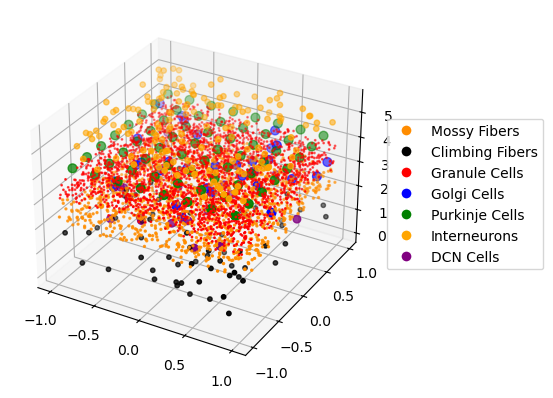

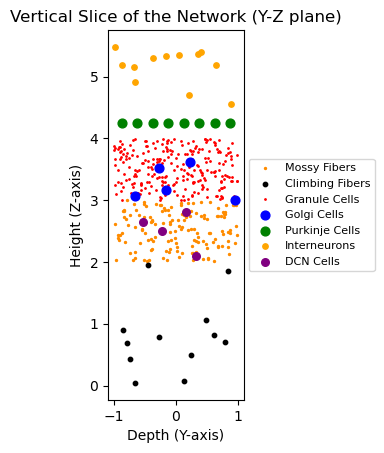

Connections from mossy_fibers to granule: 87
Connections from mossy_fibers to granule: 87
Connections from mossy_fibers to golgi: 3
Connections from mossy_fibers to golgi: 3
Simulation running...
Simulation complete.


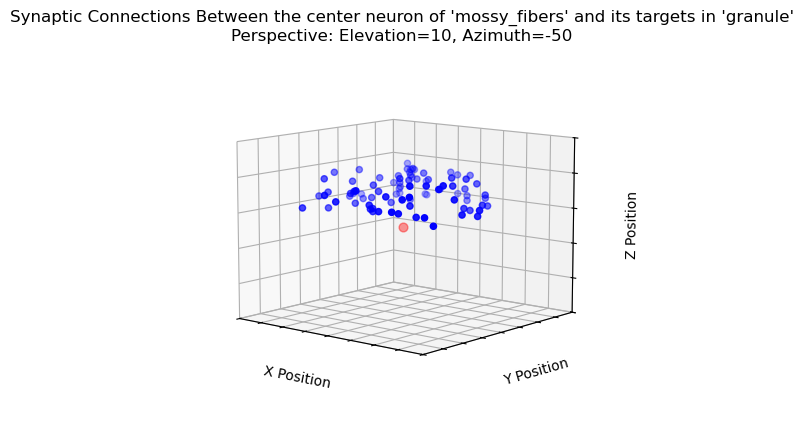

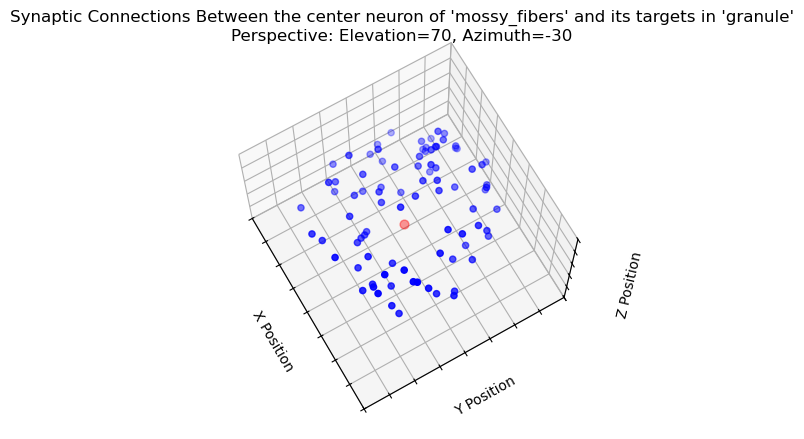

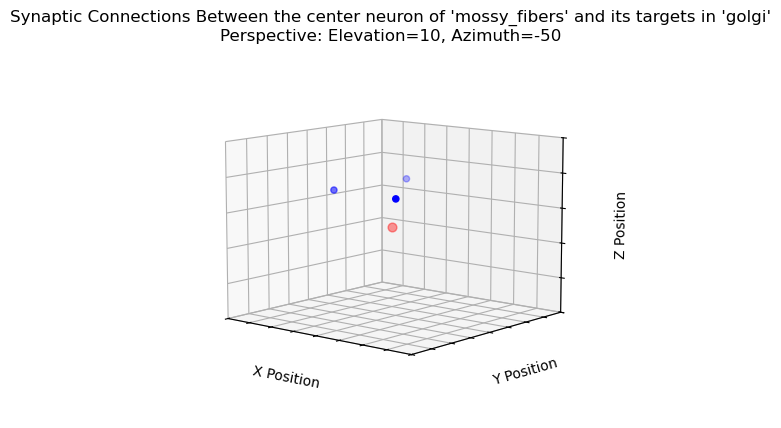

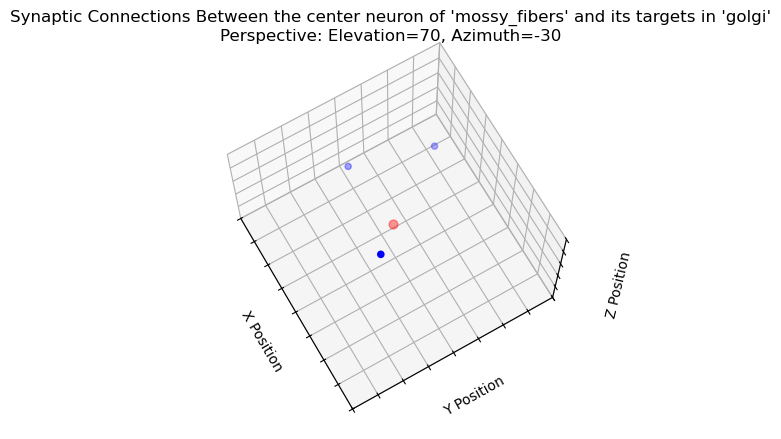

In [2]:
spatial_results = simulation.example_spatial_simulation()


In [ ]:
results = simulation.example_simulation()

Created 2500 granule cells.
Created 256 Purkinje cells.
Created 450 interneurons.
Created 100 Golgi cells.
Created 50 deep cerebellar nuclei cells.
Created 250 mossy fibers.
Created 256 climbing fibers.
Number of mossy -> granule connections: 124542
Number of mossy -> golgi connections: 5029
Number of mossy -> DCN connections: 12500
Number of granule -> golgi connections: 2427
Number of granule -> purkinje connections: 448706
Number of granule -> interneuron connections: 337406
Number of golgi -> granule connections: 24770
Number of golgi -> golgi connections: 1966
Number of climbing -> purkinje connections: 256
Number of interneuron -> purkinje connections: 22970
Number of interneuron -> interneuron connections: 80805
Number of purkinje -> DCN connections: 1280
Network setup complete.
Simulation running...

Feb 17 14:23:32 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.

Feb 17 14:23:32 

In [3]:
## Analyze spatial results

PC_spatial_spike_data = spatial_results["purkinje_spikes"]
PC_spatial_voltage_data = spatial_results["purkinje_voltages"]
GrC_spatial_spike_data = spatial_results["granule_spikes"]
GrC_spatial_voltage_data = spatial_results["granule_voltages"]
GoC_spatial_spike_data = spatial_results["golgi_spikes"]
GoC_spatial_voltage_data = spatial_results["golgi_voltages"]

PC_isis = analysis.get_isi_distribution(PC_spatial_spike_data["times"])
GrC_isis = analysis.get_isi_distribution(GrC_spatial_spike_data["times"])
GoC_isis = analysis.get_isi_distribution(GoC_spatial_spike_data["times"])

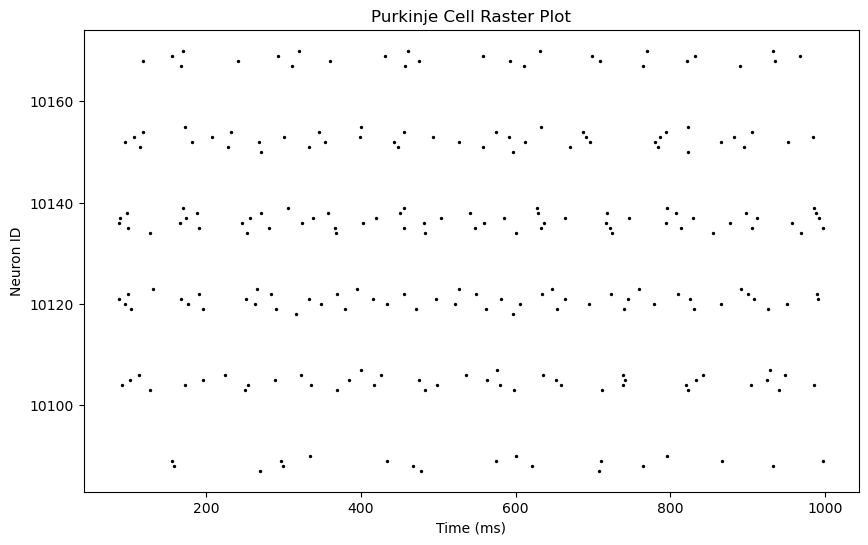

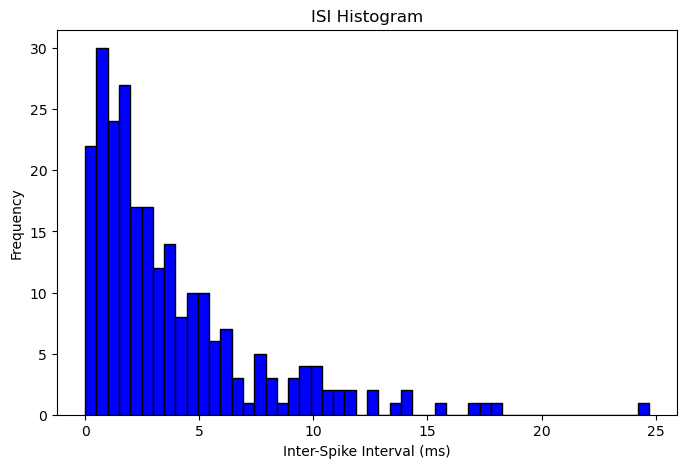

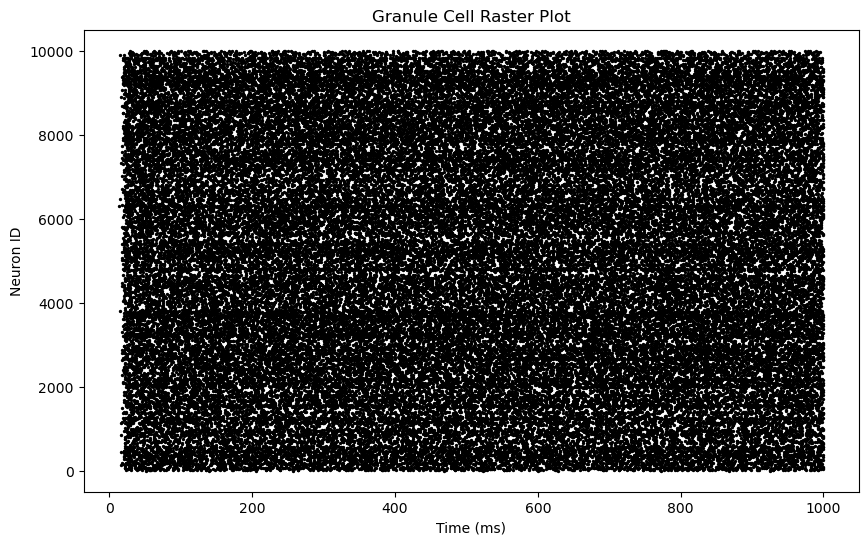

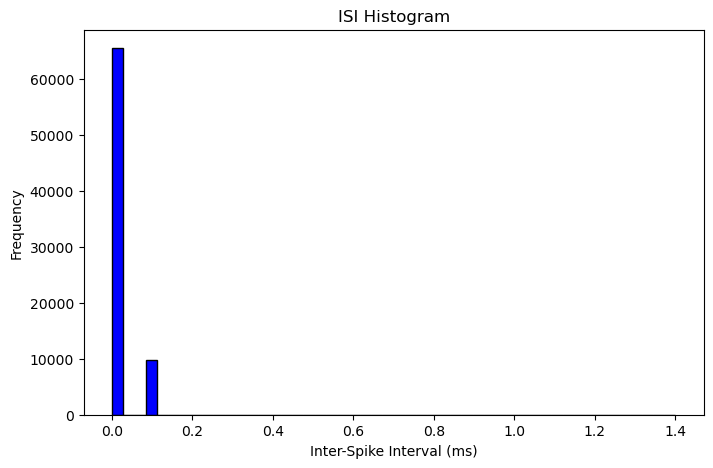

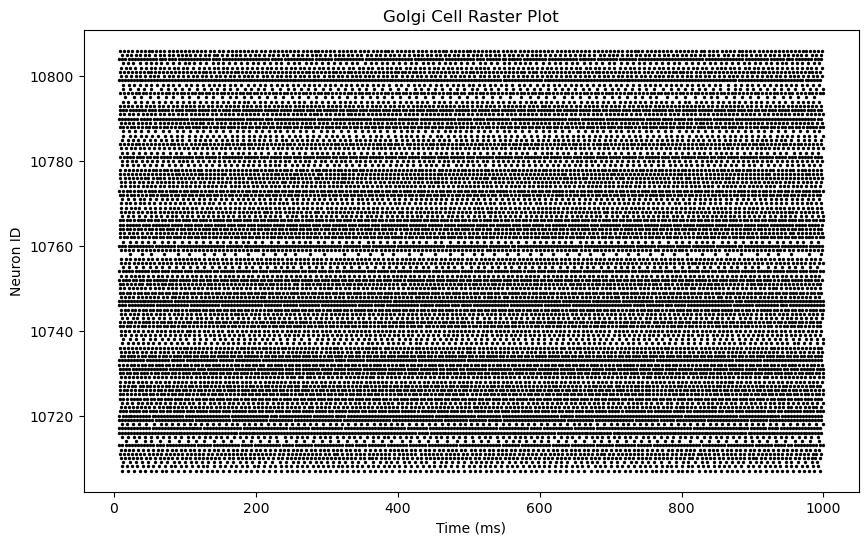

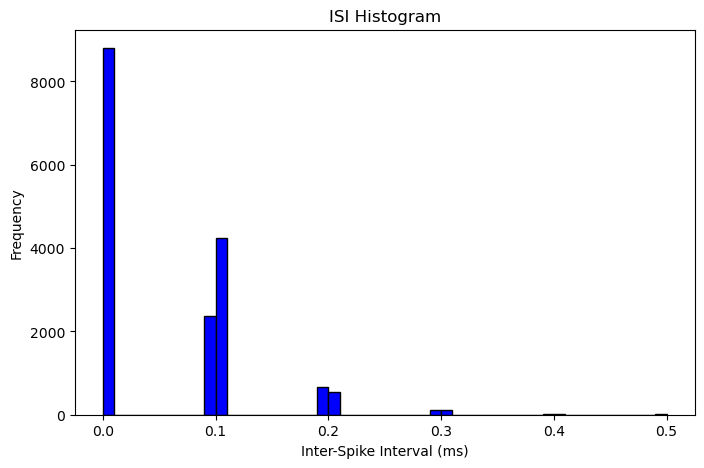

In [4]:
visualization.plot_raster(PC_spatial_spike_data, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(PC_isis)
visualization.plot_raster(GrC_spatial_spike_data, title="Granule Cell Raster Plot")
visualization.plot_isi_histogram(GrC_isis)
visualization.plot_raster(GoC_spatial_spike_data, title="Golgi Cell Raster Plot")
visualization.plot_isi_histogram(GoC_isis)

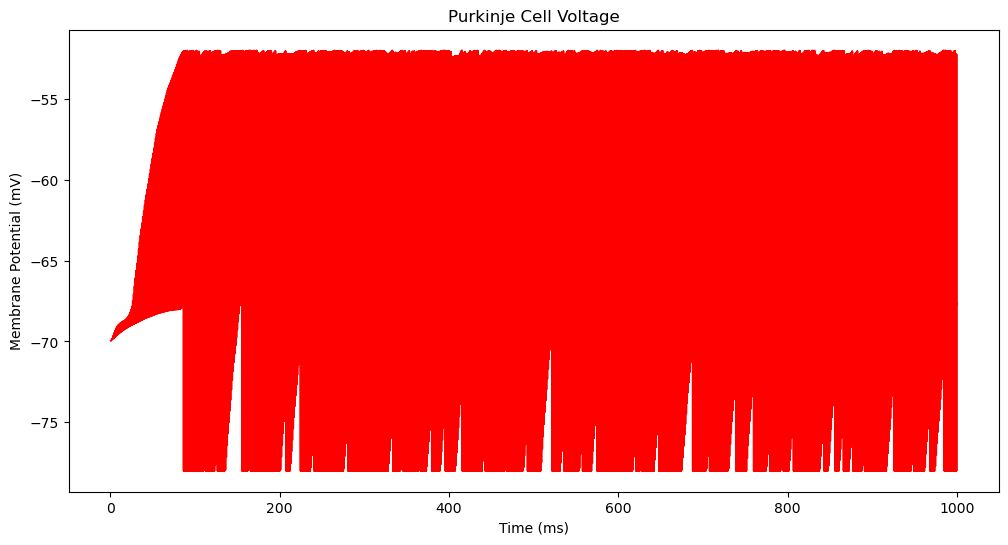

In [5]:
visualization.plot_voltage_trace(PC_spatial_voltage_data, title="Purkinje Cell Voltage")

In [2]:
nest.ResetKernel()
mf = create_spatial_mossy_fibers(1000)
GrC = create_spatial_granule_cells(1000)
connect_spatial_mossy_to_granule(mf, GrC)

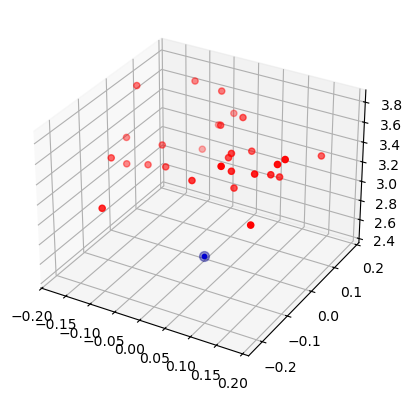

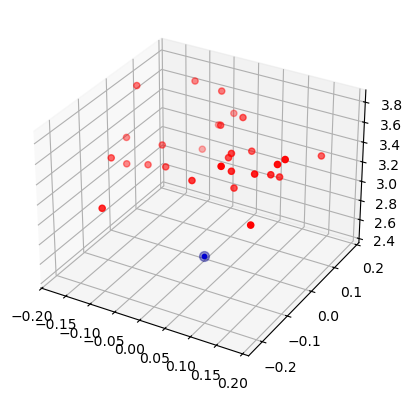

In [3]:
ctr = nest.FindCenterElement(mf)
fig = nest.PlotLayer(ctr, nodesize=10)
nest.PlotTargets(ctr, GrC, fig=fig, mask={
            "ellipsoidal": {
                "major_axis": 1.0,
                "minor_axis": 1.0,
                "polar_axis": 1.5,
                "azimuth_angle": 90,
            }
        }, probability_parameter=0.7 - nest.spatial.distance.x * 0.5 - nest.spatial.distance.y * 0.5,
            tgt_color="red", mask_color="green", probability_cmap="green", src_color = "darkblue")


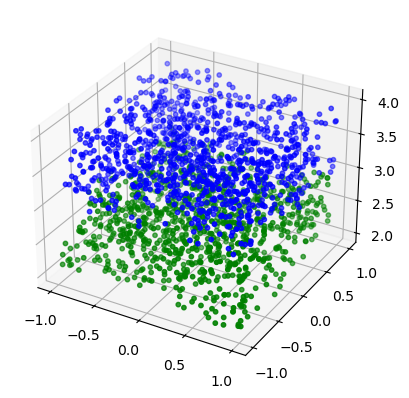

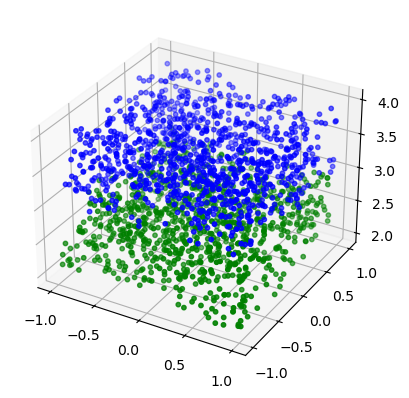

In [4]:
fig = nest.PlotLayer(GrC, nodesize=10)
nest.PlotLayer(mf, fig=fig, nodesize=10, nodecolor="green")

In [5]:
GrC[23].spatial.get("positions")

((-0.059532243305056354, -0.3714575931666173, 3.1956780838676084),)